In [1]:
import env
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd



import acquire



# pulling data via mySQL query in order to add in/join the cohort data

In [5]:
# this function will read the local csv file it needs if present, if not will perform the necessary SQL query

df0=pd.DataFrame(acquire.get_cohort_and_log_data())

In [7]:
df=df0.copy()
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2.0,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0


In [8]:
df.isnull().sum()

date               0
time               0
path               1
user_id            0
cohort_id      52893
ip                 0
id            826484
name          826484
slack         826484
start_date    826484
end_date      826484
created_at    826484
updated_at    826484
deleted_at    900223
program_id    826484
dtype: int64

In [9]:
df.dropna(subset='cohort_id',inplace=True)

df.isnull().sum()

date               0
time               0
path               1
user_id            0
cohort_id          0
ip                 0
id            774925
name          774925
slack         774925
start_date    774925
end_date      774925
created_at    774925
updated_at    774925
deleted_at    847330
program_id    774925
dtype: int64

# 1) Which lessons are least accessed? 

In [10]:
df_min_lesson=pd.DataFrame(df.path.value_counts()[df.path.value_counts(ascending=True)<25])

In [11]:
df_min_lesson.reset_index()

,index,path
0,appendix/postwork/website-status-page,24
1,8.1_Overview,24
2,acquire,24
3,3-vocabulary.md,24
4,8_Exercises,24
...,...,...
1420,content/examples/javascript/primitive-types.html,1
1421,content/examples/javascript/conditionals.html,1
1422,2-storytelling/1-overview/www.qlik.com,1
1423,syntax-types-and-variables,1


In [12]:
df_min_lesson['page']=df_min_lesson.index


In [13]:
df_min_lesson=df_min_lesson.reset_index().drop(columns='index')
df_min_lesson

,path,page
0,24,appendix/postwork/website-status-page
1,24,8.1_Overview
2,24,acquire
3,24,3-vocabulary.md
4,24,8_Exercises
...,...,...
1420,1,content/examples/javascript/primitive-types.html
1421,1,content/examples/javascript/conditionals.html
1422,1,2-storytelling/1-overview/www.qlik.com
1423,1,syntax-types-and-variables


In [14]:
df_java_lessons=df_min_lesson[df_min_lesson['page'].str.contains('java')]
df_java_lessons[df_java_lessons.path<2]

,path,page
984,1,content/javascript-with-html.html
992,1,appendix/further-reading/java/intellij-tomcat
993,1,java-ii/file-op
997,1,javascript/loops
1001,1,javascript/google-maps-api
1007,1,timeline/java-i
1011,1,java-iii/mvc/java-beans/'
1020,1,java-iii/sessions-and-cookies/style/css
1029,1,javascript-i/html-css
1030,1,javascript/apendix


# Answer:

### based on my findings there are multiple java lessons that are least accessed - specifically the ones labeled javascript introduction

# 2) Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [15]:
df2=df0.copy()
df2.set_index('date')

,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2.0,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'number of unique visits for a page')

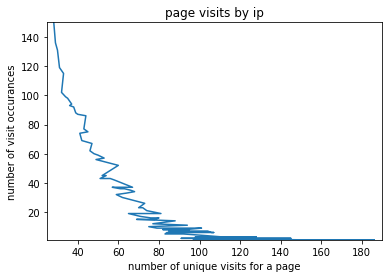

In [16]:
df2.groupby('path')['ip','date'].value_counts().sort_values(ascending=False).value_counts().plot()
plt.xlim(25,190)
plt.ylim(1,150)
plt.title('page visits by ip')
plt.ylabel('number of visit occurances')
plt.xlabel('number of unique visits for a page')

In [17]:

df2.groupby('path')['ip','date'].value_counts().sort_values(ascending=False)\
[df2.groupby('path')['ip','date'].value_counts().sort_values(ascending=False) >148]


path                                                                       ip            date      
javascript-i/introduction/working-with-data-types-operators-and-variables  97.105.19.58  2019-02-06    186
javascript-ii/map-filter-reduce                                            97.105.19.58  2018-12-17    174
javascript-i/introduction/working-with-data-types-operators-and-variables  97.105.19.61  2018-06-12    168
                                                                           97.105.19.58  2019-08-05    158
javascript-ii/promises                                                     97.105.19.61  2018-02-21    149
dtype: int64

# Answer:

### from here I can see that there are 2 ip addresses that are extreme outliers based on same page visits for one day.
###  97.105.19.58 and  97.105.19.61 respectively

# 3. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [18]:
df3=df0.copy()
df3.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2.0,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0


In [19]:
page_by_cohort = df3.groupby(['name'])['path'].value_counts()
page_by_cohort =pd.DataFrame(page_by_cohort)
page_by_cohort.columns = ['path_vc']
page_by_cohort = page_by_cohort.reset_index()
page_by_cohort = page_by_cohort[page_by_cohort['path'] != '/']
page_by_cohort = page_by_cohort.set_index('name')
page_by_cohort

,path,path_vc
name,,
Ada,appendix,111
Ada,mkdocs/search_index.json,81
Ada,javascript-i,45
Ada,jquery,28
Ada,java-iii,27
...,...,...
Zion,mysql/relationships,1
Zion,slides/exceptions_and_error_handling,1
Zion,slides/file_io,1


In [20]:
max_visits=page_by_cohort.groupby('name').max()

In [21]:
max_visits

,path,path_vc
name,,
Ada,spring/setup,111
Andromeda,toc,40
Apex,spring/setup,10
Apollo,spring/setup,19
Arches,web-design/intro,147
Badlands,spring/setup,50
Balboa,toc,54
Bash,toc,31
Bayes,spring/setup,15


In [22]:
max_visits_df = pd.DataFrame()
for x in max_visits.index:
    df_blank = page_by_cohort.loc[x][page_by_cohort.loc[x]['path_vc'] == (max_visits.loc[x]['path_vc'])]
    max_visits_df = pd.concat([max_visits_df, df_blank])
max_visits_df

,path,path_vc
name,,
Ada,appendix,111
Andromeda,spring,40
Apex,mkdocs/search_index.json,10
Apollo,jquery,19
Arches,6-regression/1-overview,147
Badlands,java-iii,50
Balboa,spring,54
Bash,spring,31
Bayes,javascript-i,15


In [23]:
max_visits_df.sort_values(by='path_vc',ascending=False)

,path,path_vc
name,,
Fortuna,index.html,1477
Ike,sql/mysql-overview,487
Arches,6-regression/1-overview,147
Ada,appendix,111
Redwood,spring,101
Betelgeuse,mkdocs/search_index.json,64
Wrangell,javascript-i/functions,63
Everglades,java-iii,62
Yosemite,spring,60


In [24]:

page_by_cohort[(page_by_cohort.index.isin(df3.name)) & (page_by_cohort['path'] == 'index.html')]

,path,path_vc
name,,
Bash,index.html,27
Fortuna,index.html,1477
Sequoia,index.html,16


# 4. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [25]:
df4=df0.copy()
df4.head()




,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2.0,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0


In [26]:
df4=df4[df4.path != 'appendix']

In [27]:
df4=df4[df4.path != '/']

In [28]:
cohort_top_path_visits=pd.DataFrame(df4.groupby('name')['path'].value_counts())#.nlargest(n=5)
cohort_top_path_visits.columns=['path_counts']
cohort_top_path_visits=cohort_top_path_visits.reset_index()

In [29]:
cohort_top_path_visits.drop_duplicates('name')

,name,path,path_counts
0,Ada,mkdocs/search_index.json,81
160,Andromeda,spring,40
316,Apex,mkdocs/search_index.json,10
375,Apollo,jquery,19
519,Arches,6-regression/1-overview,147
1493,Badlands,java-iii,50
1642,Balboa,spring,54
1784,Bash,spring,31
1968,Bayes,javascript-i,15
2089,Betelgeuse,mkdocs/search_index.json,64


In [30]:
top_df_=cohort_top_path_visits.drop_duplicates('name')

top_df_.path.value_counts()

mkdocs/search_index.json                                                     12
spring                                                                        9
java-iii                                                                      3
jquery                                                                        2
javascript-i                                                                  2
java-i                                                                        2
index.html                                                                    2
javascript-i/functions                                                        2
html-css                                                                      1
javascript-i/arrays/manipulating                                              1
html-css/introduction                                                         1
javascript-ii/promises                                                        1
mysql                                   

# Answer:

### the spring lesson appears to be most prevalent based on it being the top visited lesson for 9 different cohorts

# 5. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?


.

In [32]:
df5=df0.copy()

student_df = df5[df5.name != 'Staff']
student_df

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2.0,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900218,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900219,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900220,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900221,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
student_df.date = pd.to_datetime(student_df.date)
    # Sort rows by the date and then set the index as that date
student_df = student_df.set_index('date').sort_index()

In [34]:
student_df

,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2.0,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
active_df = student_df[(student_df.end_date >= student_df.index) & (student_df.start_date <= student_df.index)]
active_df = active_df[active_df['path'] != '/']

In [36]:
active_df

,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,,
2018-01-26,10:59:02,index.html,21,16.0,71.137.146.71,21.0,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,NaN,2.0
2018-01-26,10:59:06,java-i,21,16.0,71.137.146.71,21.0,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,NaN,2.0
2018-01-26,11:11:52,html-css/introduction,22,21.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0
2018-01-26,11:11:56,appendix,22,21.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0
2018-01-26,11:12:07,appendix/capstone-workbook,22,21.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-22,15:03:23,java-i,53,28.0,67.10.174.56,53.0,Fortuna,#fortuna,2020-01-13,2020-06-23,2020-01-13 21:17:08,2020-01-13 21:17:08,NaN,2.0
2020-06-22,15:03:26,java-ii,53,28.0,67.10.174.56,53.0,Fortuna,#fortuna,2020-01-13,2020-06-23,2020-01-13 21:17:08,2020-01-13 21:17:08,NaN,2.0
2020-06-23,10:51:46,index.html,53,28.0,67.10.174.56,53.0,Fortuna,#fortuna,2020-01-13,2020-06-23,2020-01-13 21:17:08,2020-01-13 21:17:08,NaN,2.0


In [37]:
page_by_student = active_df.groupby(['user_id'])['path'].value_counts()
page_by_student =pd.DataFrame(page_by_student)
page_by_student.columns = ['path_vc']
page_by_student = page_by_student.reset_index()
page_by_student = page_by_student.groupby('user_id').sum('path_vc')
page_by_student.nsmallest(n=5, columns='path_vc')

,path_vc
user_id,
21,53
25,56
26,63
23,95
31,96


In [38]:
active_df[active_df.user_id==21]

,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,,
2018-01-26,10:59:02,index.html,21,16.0,71.137.146.71,21.0,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,NaN,2.0
2018-01-26,10:59:06,java-i,21,16.0,71.137.146.71,21.0,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,NaN,2.0
2018-01-30,10:21:40,index.html,21,16.0,170.248.173.246,21.0,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,NaN,2.0
2018-01-30,10:21:42,spring,21,16.0,170.248.173.246,21.0,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,NaN,2.0
2018-01-31,18:11:47,index.html,21,16.0,71.137.146.71,21.0,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,NaN,2.0
2018-01-31,18:11:50,spring,21,16.0,71.137.146.71,21.0,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,NaN,2.0
2018-01-31,18:11:55,spring/fundamentals/controllers,21,16.0,71.137.146.71,21.0,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,NaN,2.0
2018-01-31,18:12:31,spring/fundamentals/views,21,16.0,71.137.146.71,21.0,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,NaN,2.0
2018-02-01,11:49:46,index.html,21,16.0,170.248.173.247,21.0,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,NaN,2.0


# Answer:

### I was able to filter page visits where the visit occurred in between the start and end date for the user and I excluded staff. From there I was able to do a value count for total page visits and I took the smallest value. I found that user_id 21 only had 53 visits for the whole time active- by far the lowest.  I then went back to my dataframe of active student page visits and pulled a boolean mask to find user number 21. from there I was able to see all the data to include active dates, was in Sequoia cohort.